In [1]:
# Setting up spark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
print(spark)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Check Spark Version - it changes fast!
print(spark.version)

3.0.0-preview2


In [3]:
sql_df = sqlContext.read.format("csv").option("header", "true").load("hdfs://localhost:9000/eda/dc_aquasitions.csv")

In [4]:
spark_df=spark.read.csv("hdfs://localhost:9000/eda/dc_aquasitions.csv", header='true', inferSchema='true')

spark_df.printSchema()
spark_df.show(5)
spark_df.head(5)
spark_df.count()

root
 |-- _c0: integer (nullable = true)
 |-- company_permalink: string (nullable = true)
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- company_region: string (nullable = true)
 |-- company_city: string (nullable = true)
 |-- acquirer_permalink: string (nullable = true)
 |-- acquirer_name: string (nullable = true)
 |-- acquirer_category_list: string (nullable = true)
 |-- acquirer_country_code: string (nullable = true)
 |-- acquirer_region: string (nullable = true)
 |-- acquirer_city: string (nullable = true)
 |-- acquired_at: string (nullable = true)
 |-- acquired_month: string (nullable = true)
 |-- price_currency_code: string (nullable = true)

+---+--------------------+--------------+---------------------+--------------------+--------------+-------------+--------------------+--------------------+----------------------+---------------------+---------------+-------------+------

12036

In [5]:
spark_df.describe('company_country_code','acquired_at').show()
#spark_df.describe().show()

+-------+--------------------+-----------+
|summary|company_country_code|acquired_at|
+-------+--------------------+-----------+
|  count|               12036|      12036|
|   mean|                null|       null|
| stddev|                null|       null|
|    min|                 ARE| 1972-01-01|
|    max|                 USA| 2015-12-28|
+-------+--------------------+-----------+



In [23]:
spark_df[['acquirer_name']].describe().show()

+-------+--------------------+
|summary|       acquirer_name|
+-------+--------------------+
|  count|               12036|
|   mean|               200.0|
| stddev|                 NaN|
|    min|"EMG Connexus, In...|
|    max|               zanox|
+-------+--------------------+



In [28]:
#print(spark_df.cov('company_category_list', 'acquirer_category_list'))
#print(spark_df.stat.corr('company_category_list', 'acquirer_category_list'))

In [128]:
spark_df = spark_df.drop("company_permalink","_c0","acquirer_permalink")
spark_df.printSchema()
spark_df.select('company_region').distinct().rdd.map(lambda r: r[0]).collect()

root
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- company_region: string (nullable = true)
 |-- company_city: string (nullable = true)
 |-- acquirer_name: string (nullable = true)
 |-- acquirer_category_list: string (nullable = true)
 |-- acquirer_country_code: string (nullable = true)
 |-- acquirer_region: string (nullable = true)
 |-- acquirer_city: string (nullable = true)
 |-- acquired_at: string (nullable = true)
 |-- acquired_month: string (nullable = true)
 |-- price_currency_code: string (nullable = true)



['Moscow',
 'Salt Lake City',
 'SF Bay Area',
 'Seattle',
 'New York City',
 'Greenville - Spartanburg',
 'Jacksonville',
 'Munich',
 'Los Angeles',
 'Stockholm',
 'Hyderabad',
 'Boston',
 'Bangalore',
 'Atlanta',
 'Palm Beaches',
 'New Delhi',
 'AL - Other',
 'Brussels',
 'Sydney',
 'Ft. Lauderdale',
 'Denver',
 'Cedar Rapids',
 'Brisbane',
 'Anaheim',
 'Nottingham',
 'Phoenix',
 'Austin',
 'Frankfurt',
 'Berlin',
 'FRA - Other',
 'Sofia',
 'Baltimore',
 'Mumbai',
 'San Diego',
 'Honolulu',
 'Philadelphia',
 'Blackrock',
 'Moline - Davenport',
 'GA - Other',
 'Washington, D.C.',
 'London',
 'Tokyo',
 'Guangzhou',
 'Seoul',
 'Edinburgh',
 'Chicago',
 'Toronto',
 'Raleigh',
 'Newcastle',
 'Pavia',
 'Houston',
 'Vancouver',
 'Fuzhou Shi',
 'Shanghai',
 'Cleveland',
 'Charleston, South Carolina',
 'Paris',
 'Antwerp',
 'PA - Other',
 'Roanoke',
 'Ontario - Inland Empire',
 'GBR - Other',
 'Neuilly-sur-seine',
 'IL - Other',
 'Wilmington - Cape Fear, North Carolina',
 'Amsterdam',
 'Dublin

In [129]:
spark_df.filter(spark_df['acquirer_category_list']=="Consumer Goods").show()

+--------------------+---------------------+--------------------+--------------+------------+--------------------+----------------------+---------------------+---------------+---------------+-----------+--------------+-------------------+
|        company_name|company_category_list|company_country_code|company_region|company_city|       acquirer_name|acquirer_category_list|acquirer_country_code|acquirer_region|  acquirer_city|acquired_at|acquired_month|price_currency_code|
+--------------------+---------------------+--------------------+--------------+------------+--------------------+----------------------+---------------------+---------------+---------------+-----------+--------------+-------------------+
|      Alberto Culver|          Curated Web|                 USA|       Chicago|Melrose Park|            Unilever|        Consumer Goods|                  GBR|         London|    Leatherhead| 2010-09-27|       2010-09|                USD|
|Dometic Internati...|       Consumer Goods|

In [130]:
spark_df.filter(spark_df['company_category_list'].isNull()).count()
for col in spark_df.columns:
    print(col, "\t", "with null values: ", spark_df.filter(spark_df[col].isNull()).count())
    
#df = df.replace(‘?’,None)
#df=df.replace(‘ckd\t’, ‘ckd’)

#But if you want to replace the values only in particular column, you can’t simply use replace function. You have to use pyspark.sql.functions.
#replace no with notckd of class column
#from pyspark.sql.functions import when, lit
#df = df.withColumn(‘class’, when(df[‘class’]==’no’,
#lit(“notckd”)).otherwise(df[‘class’]))

company_name 	 with null values:  0
company_category_list 	 with null values:  0
company_country_code 	 with null values:  0
company_region 	 with null values:  0
company_city 	 with null values:  0
acquirer_name 	 with null values:  0
acquirer_category_list 	 with null values:  0
acquirer_country_code 	 with null values:  0
acquirer_region 	 with null values:  0
acquirer_city 	 with null values:  0
acquired_at 	 with null values:  0
acquired_month 	 with null values:  0
price_currency_code 	 with null values:  0


In [131]:
spark_df.select('company_category_list').show()

+---------------------+
|company_category_list|
+---------------------+
| Consumer Electron...|
| Consumer Goods|Re...|
| Apps|Cable|Distri...|
| Art|E-Commerce|Ma...|
|          Curated Web|
|            Analytics|
|             Software|
|          Curated Web|
|          Web Hosting|
| Big Data|Local Bu...|
| Big Data|Local Bu...|
|   Financial Services|
|           E-Commerce|
| Augmented Reality...|
|          Advertising|
|             Software|
| Clean Technology|...|
|          Chat|Mobile|
| Doctors|Health Ca...|
| Doctors|Health Ca...|
+---------------------+
only showing top 20 rows



In [132]:
spark_df.select('company_category_list').distinct().count() #to get distinct case status

5171

In [133]:

spark_df.crosstab('company_category_list', 'acquirer_country_code').show()

+-------------------------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|company_category_list_acquirer_country_code|ARE|ARG|AUS|AUT|BEL|BGR|BHR|BLR|BMU|BRA|CAN|CHE|CHL|CHN|COL|CYP|CZE|DEU|DNK|EGY|ESP|EST|FIN|FRA|GBR|GGY|GHA|GIB|GRC|HKG|HRV|HUN|IMN|IND|IRL|ISR|ITA|JEY|JOR|JPN|KOR|KWT|LTU|LUX|MEX|MUS|MYS|NLD|NOR|NZL|PHL|POL|ROM|RUS|SAU|SGP|SVK|SWE|THA|TUR|TWN|UGA|URY|USA|ZAF|
+-------------------------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                       Aerospace|Mobile|...|  0|  0|  0|  0|  0|  0|  0|  0|  0| 

In [135]:
spark_df.createOrReplaceTempView("acquisitions")

In [136]:
sqlDF = spark.sql("SELECT company_name FROM acquisitions")
sqlDF.show()

+--------------------+
|        company_name|
+--------------------+
|              003.RU|
|      1-800 Contacts|
|        1 Mainstream|
|        1000 Markets|
|        1000memories|
|             100Plus|
|            1010data|
|              10best|
|              10East|
|            10stamps|
|            10stamps|
|    118Boardshop.com|
|           12Society|
|            13th Lab|
|              160by2|
|         170 Systems|
|One Block Off the...|
|              1CLICK|
|             1DocWay|
|             1DocWay|
+--------------------+
only showing top 20 rows



In [ ]:
#fill missing values using mean of the column of PySpark Dataframe

#from pyspark.sql.functions import avg

#def mean_of_pyspark_columns(df, numeric_cols, verbose=False):
    #col_with_mean=[]
    #for col in numeric_cols:
        #mean_value = df.select(avg(df[col]))
        #avg_col = mean_value.columns[0]
        #res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        #if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        #col_with_mean.append([col, res[0]])    
    #return col_with_mean
    
    
#or 

#Fill missing values for mean
#from pyspark.sql.functions import when, lit

#def fill_missing_with_mean(df, numeric_cols):
    #col_with_mean = mean_of_pyspark_columns(df, numeric_cols) 
    
    #for col, mean in col_with_mean:
        #df = df.withColumn(col, when(df[col].isNull()==True, 
        #lit(mean)).otherwise(df[col]))
        
    #return df
    
    
#Fill missing values for mode
#from pyspark.sql.functions import when, lit

#def fill_missing_with_mode(df, cat_col_list):
    #col_with_mode =mode_of_pyspark_columns(df, cat_col_list)
    
    #for col, mode in col_with_mode:
        #df = df.withColumn(col, when(df[col].isNull()==True, 
        #lit(mode)).otherwise(df[col]))
        
    #return df

In [7]:
panda_df = spark_df.toPandas()
print(len(panda_df.columns))
print((panda_df.count()))

16
_c0                       12036
company_permalink         12036
company_name              12036
company_category_list     12036
company_country_code      12036
company_region            12036
company_city              12036
acquirer_permalink        12036
acquirer_name             12036
acquirer_category_list    12036
acquirer_country_code     12036
acquirer_region           12036
acquirer_city             12036
acquired_at               12036
acquired_month            12036
price_currency_code       12036
dtype: int64


In [8]:
panda_df[['company_category_list','company_country_code','company_region','company_city']].describe()

,company_category_list,company_country_code,company_region,company_city
count,12036,12036,12036,12036
unique,5171,70,592,1993
top,Software,USA,SF Bay Area,San Francisco
freq,1313,9055,2358,795


In [9]:
panda_df.describe()

,_c0
count,12036.000000
mean,9497.164423
std,5487.426576
min,0.000000
25%,4689.750000
50%,9542.500000
75%,14276.250000
max,18966.000000


In [10]:
panda_df.head(10)

,_c0,company_permalink,company_name,company_category_list,company_country_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_currency_code
0,0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,Barcelona,Barcelona,2012-07-23,2012-07,USD
1,3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,Boston,Boston,2014-01-07,2014-01,USD
2,5,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,SF Bay Area,Cupertino,/organization/cisco,Cisco,Communications Infrastructure|Data Center Infr...,USA,SF Bay Area,San Jose,2015-10-28,2015-10,USD
3,7,/organization/1000-markets,1000 Markets,Art|E-Commerce|Marketplaces,USA,Seattle,Seattle,/organization/bonanzle,Bonanza,Art|Beauty|Collectibles|E-Commerce|Fashion|Mar...,USA,Seattle,Seattle,2012-09-22,2012-09,USD
4,9,/organization/1000memories,1000memories,Curated Web,USA,SF Bay Area,San Francisco,/organization/ancestry-com,Ancestry,E-Commerce|Internet,USA,Salt Lake City,Provo,2012-10-03,2012-10,USD
5,10,/organization/100plus,100Plus,Analytics,USA,SF Bay Area,San Francisco,/organization/practice-fusion,Practice Fusion,Electronic Health Records|Health and Wellness|...,USA,SF Bay Area,San Francisco,2013-02-27,2013-02,USD
6,11,/organization/1010data,1010data,Software,USA,New York City,New York,/organization/advance-publications,Advance Publications,Media,USA,New York City,Staten Island,2015-08-03,2015-08,USD
7,12,/organization/10best,10best,Curated Web,USA,Greenville - Spartanburg,Greenville,/organization/nile-guide,NileGuide,Career Planning|Social Media|Travel,USA,SF Bay Area,San Francisco,2011-01-25,2011-01,USD
8,13,/organization/10east,10East,Web Hosting,USA,Jacksonville,Jacksonville,/organization/railcar-management,Railcar Management,Enterprise Software,USA,Jacksonville,Jacksonville,2009-04-14,2009-04,USD
9,15,/organization/10stamps-contigua,10stamps,Big Data|Local Businesses|Mobile,DEU,Munich,Munich,/organization/10stamps-contigua,10stamps,Big Data|Local Businesses|Mobile,DEU,Munich,Munich,2015-11-23,2015-11,USD


In [11]:
panda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 16 columns):
_c0                       12036 non-null int32
company_permalink         12036 non-null object
company_name              12036 non-null object
company_category_list     12036 non-null object
company_country_code      12036 non-null object
company_region            12036 non-null object
company_city              12036 non-null object
acquirer_permalink        12036 non-null object
acquirer_name             12036 non-null object
acquirer_category_list    12036 non-null object
acquirer_country_code     12036 non-null object
acquirer_region           12036 non-null object
acquirer_city             12036 non-null object
acquired_at               12036 non-null object
acquired_month            12036 non-null object
price_currency_code       12036 non-null object
dtypes: int32(1), object(15)
memory usage: 1.4+ MB


In [12]:
panda_df.drop_duplicates(keep='first', inplace = True)

In [13]:
panda_df.shape

(12036, 16)

In [14]:
panda_df.isnull().sum().sort_values(ascending=False)

price_currency_code       0
acquired_month            0
acquired_at               0
acquirer_city             0
acquirer_region           0
acquirer_country_code     0
acquirer_category_list    0
acquirer_name             0
acquirer_permalink        0
company_city              0
company_region            0
company_country_code      0
company_category_list     0
company_name              0
company_permalink         0
_c0                       0
dtype: int64

In [17]:
count1=panda_df['company_category_list'].value_counts()
cc_list=count1.head(10)
print(cc_list)

Software               1313
Biotechnology           488
Curated Web             415
Enterprise Software     346
Mobile                  266
Advertising             234
Hardware + Software     206
Games                   204
E-Commerce              199
Semiconductors          193
Name: company_category_list, dtype: int64


In [40]:
count2=panda_df['acquirer_country_code'].value_counts()
acn_list=count2.head(10)
print(acn_list)

USA    9341
GBR     568
CAN     317
DEU     225
FRA     184
JPN     170
IND     155
CHE      97
ISR      92
CHN      76
Name: acquirer_country_code, dtype: int64


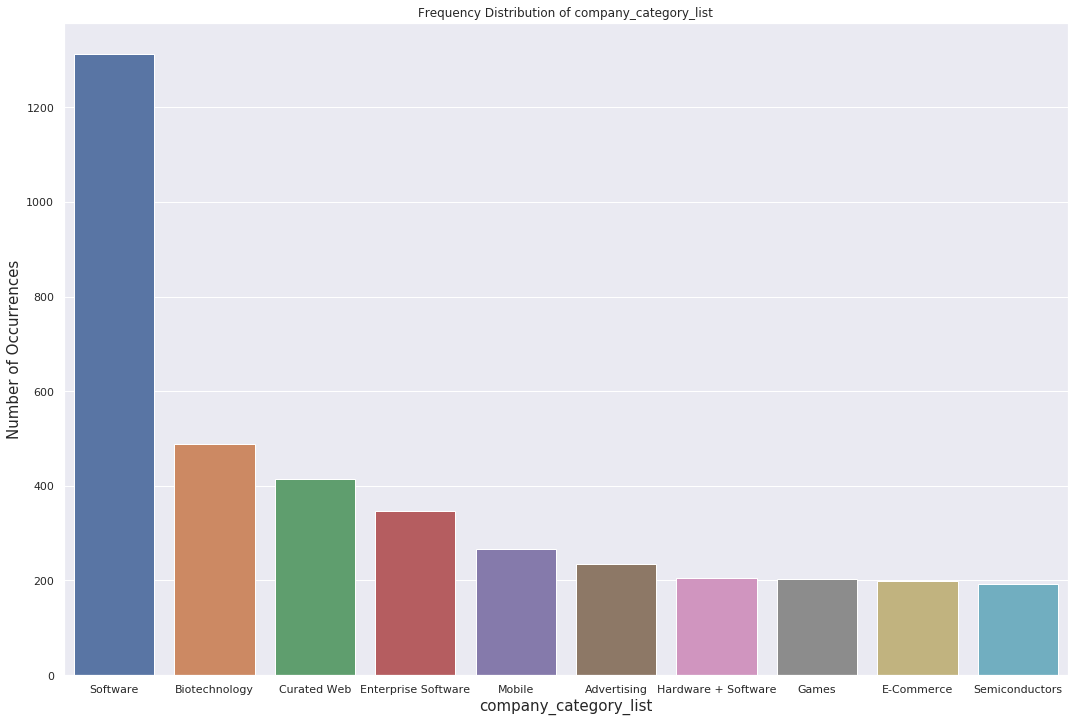

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.barplot(cc_list.index, cc_list.values, alpha=1)
plt.title('Frequency Distribution of company_category_list')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('company_category_list', fontsize=15)
plt.show()

In [30]:
#sns.lmplot(y = 'company_category_list', x = 'acquirer_city', data=panda_df)

In [35]:
#sns.heatmap(panda_df.corr(), annot=True, linewidth=0.5)

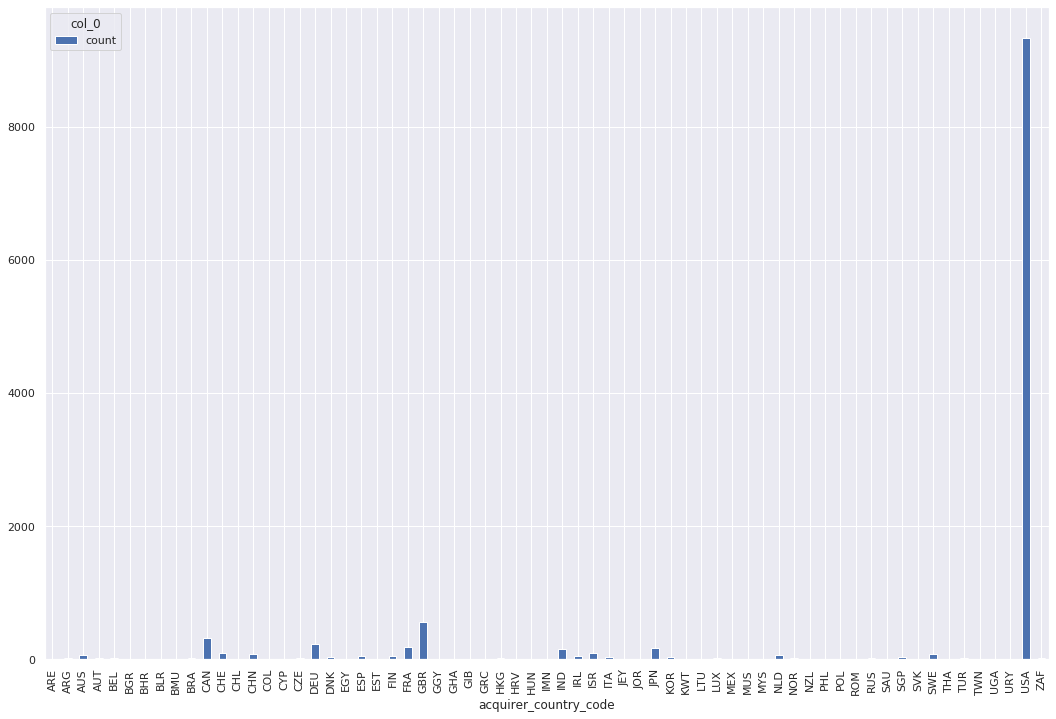

In [46]:
my_tab = pd.crosstab(index = panda_df["acquirer_country_code"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab.plot.bar()

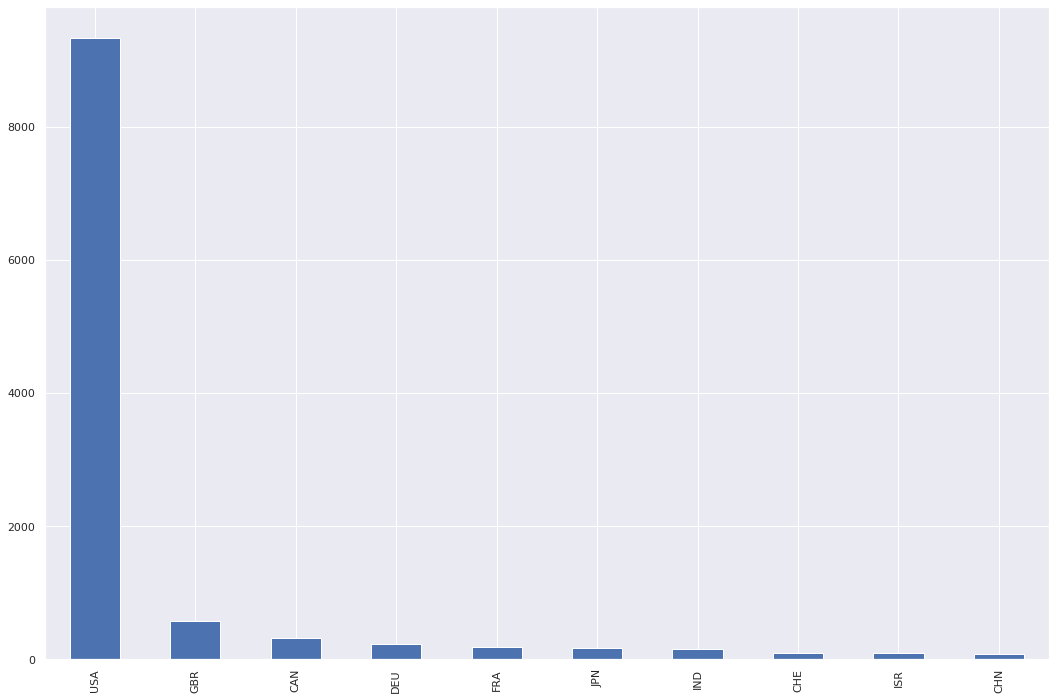

In [47]:
acn_list.plot.bar()

In [43]:
print(my_tab)

col_0                  count
acquirer_country_code       
ARE                        8
ARG                       15
AUS                       72
AUT                       16
BEL                       23
...                      ...
TWN                        7
UGA                        2
URY                        1
USA                     9341
ZAF                       20

[65 rows x 1 columns]


In [48]:
grouped = panda_df.groupby(['company_category_list','acquirer_country_code'])
grouped.size()

company_category_list                      acquirer_country_code
3D Printing|Medical Devices|Software       BEL                      1
3D Printing|Printing                       USA                      1
3D Technology                              USA                      1
3D Technology|Collaboration|Content        FRA                      1
3D Technology|Games|Virtual Worlds         USA                      1
                                                                   ..
iPhone|Mobile|Weddings                     USA                      1
iPhone|News                                USA                      1
iPhone|Photo Sharing|Software              CAN                      1
iPhone|Software|Translation|Visualization  USA                      1
iPhone|iPod Touch|Mobile                   USA                      1
Length: 5964, dtype: int64

In [51]:
clarity_color_table = pd.crosstab(index=panda_df["company_category_list"], 
                          columns=panda_df["acquirer_country_code"])

clarity_color_table

acquirer_country_code,ARE,ARG,AUS,AUT,BEL,BGR,BHR,BLR,BMU,BRA,...,SGP,SVK,SWE,THA,TUR,TWN,UGA,URY,USA,ZAF
company_category_list,,,,,,,,,,,,,,,,,,,,,
3D Printing|Medical Devices|Software,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D Printing|Printing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3D Technology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3D Technology|Collaboration|Content,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D Technology|Games|Virtual Worlds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iPhone|Mobile|Weddings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
iPhone|News,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
iPhone|Photo Sharing|Software,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#clarity_color_table.plot(kind="bar", 
                 #figsize=(8,8),
                 ##stacked=True)